🖥️  Usando dispositivo: cuda

📊 CARGANDO DATOS
✅ Dataset cargado: 307511 filas, 191 columnas

🔧 PREPARANDO DATOS
Target distribution:
  - Clase 0 (No default): 282686 (91.93%)
  - Clase 1 (Default): 24825 (8.07%)

📈 Features numéricas: 175
📝 Features categóricas: 12

🔄 Codificando variables categóricas...
✅ 12 variables categóricas codificadas

✅ Dataset preparado: 189 features

✂️ DIVIDIENDO DATOS
Training set: 209106 samples
Validation set: 36902 samples
Test set: 61503 samples

📏 NORMALIZANDO FEATURES
✅ Features normalizadas (media=0, std=1)

⚖️ Class weights calculados:
  - Clase 0: 0.5439
  - Clase 1: 6.1935

🧠 CONSTRUYENDO RED NEURONAL

📐 Arquitectura del modelo:
CreditRiskClassifier(
  (network): Sequential(
    (0): Linear(in_features=189, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features

C:\Users\usuario\Desktop\4geeks\Final_Proyect_Credit_Default_Risk-main\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Loss: 0.3491, AUC: 0.7149 - Val Loss: 0.3308, Val AUC: 0.7502
Epoch 2/50 - Loss: 0.3291, AUC: 0.7513 - Val Loss: 0.3262, Val AUC: 0.7577
Epoch 3/50 - Loss: 0.3264, AUC: 0.7575 - Val Loss: 0.3265, Val AUC: 0.7595
Epoch 4/50 - Loss: 0.3243, AUC: 0.7621 - Val Loss: 0.3245, Val AUC: 0.7618
Epoch 5/50 - Loss: 0.3221, AUC: 0.7673 - Val Loss: 0.3260, Val AUC: 0.7589
Epoch 6/50 - Loss: 0.3184, AUC: 0.7756 - Val Loss: 0.3240, Val AUC: 0.7637
Epoch 7/50 - Loss: 0.3169, AUC: 0.7789 - Val Loss: 0.3236, Val AUC: 0.7641
Epoch 8/50 - Loss: 0.3162, AUC: 0.7803 - Val Loss: 0.3235, Val AUC: 0.7645
Epoch 9/50 - Loss: 0.3155, AUC: 0.7820 - Val Loss: 0.3236, Val AUC: 0.7644
Epoch 10/50 - Loss: 0.3140, AUC: 0.7856 - Val Loss: 0.3233, Val AUC: 0.7645
Epoch 11/50 - Loss: 0.3139, AUC: 0.7855 - Val Loss: 0.3235, Val AUC: 0.7641
Epoch 12/50 - Loss: 0.3145, AUC: 0.7839 - Val Loss: 0.3235, Val AUC: 0.7645
Epoch 13/50 - Loss: 0.3141, AUC: 0.7848 - Val Loss: 0.3234, Val AUC: 0.7647
Epoch 14/50 - Loss: 0

C:\Users\usuario\AppData\Local\Temp\ipykernel_30740\1667449174.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../models/best_model.p


📊 CLASSIFICATION REPORT

                precision    recall  f1-score   support

No Default (0)     0.9222    0.9965    0.9579     56538
   Default (1)     0.5220    0.0431    0.0796      4965

      accuracy                         0.9196     61503
     macro avg     0.7221    0.5198    0.5188     61503
  weighted avg     0.8899    0.9196    0.8870     61503


📉 CONFUSION MATRIX

Confusion Matrix:
                 Predicted
                 0        1
Actual  0     56342     196
        1      4751     214

📈 MÉTRICAS ADICIONALES
ROC-AUC Score: 0.7710
Specificity (TNR): 0.9965
F1-Score Clase 0: 0.9579
F1-Score Clase 1: 0.0796
Balanced Accuracy: 0.5198

📊 GENERANDO VISUALIZACIONES


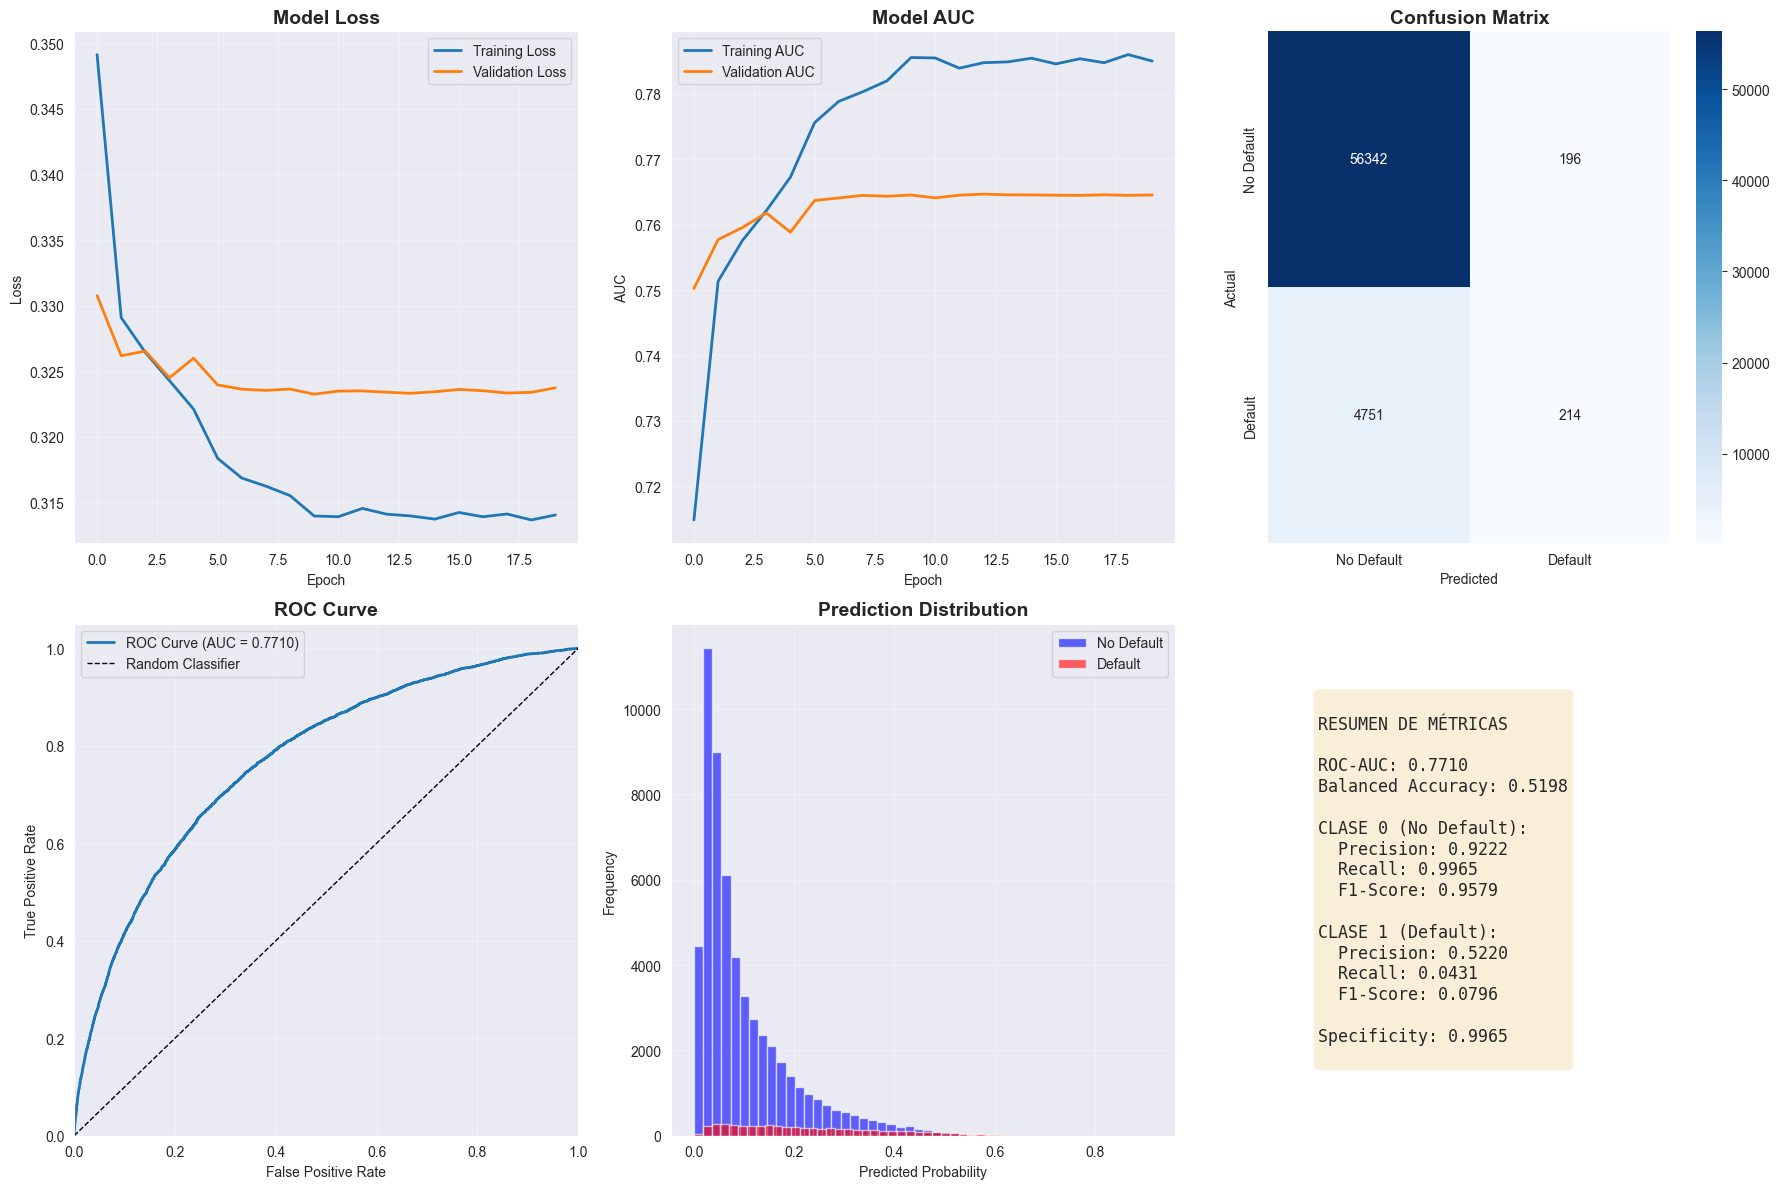


💾 GUARDANDO MODELO
✅ Modelo guardado en: ../models/neural_network_classifier.pth
✅ Scaler guardado en: ../models/scaler.pkl

✅ PROCESO COMPLETADO

🎯 ROC-AUC Score: 0.7710
📊 Balanced Accuracy: 0.5198
🔥 F1-Score (Clase 1): 0.0796
💪 Specificity: 0.9965

💡 Archivos generados:
   - Modelo: ../models/neural_network_classifier.pth
   - Scaler: ../models/scaler.pkl
   - Gráficos: ../reports/figures/neural_network_metrics.png


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, balanced_accuracy_score
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm

# ==========================================
# CONFIGURACIÓN
# ==========================================
RANDOM_STATE = 42
TEST_SIZE = 0.2
VALIDATION_SPLIT = 0.15
BATCH_SIZE = 256
EPOCHS = 50
LEARNING_RATE = 0.001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_STATE)

print(f"🖥️  Usando dispositivo: {DEVICE}")

# ==========================================
# CARGA DE DATOS
# ==========================================
print("\n" + "=" * 60)
print("📊 CARGANDO DATOS")
print("=" * 60)

df = pd.read_parquet("../data/interim/train_final_advanced_features2.parquet")
print(f"✅ Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

# ==========================================
# PREPARACIÓN DE DATOS
# ==========================================
print("\n" + "=" * 60)
print("🔧 PREPARANDO DATOS")
print("=" * 60)

target_col = 'TARGET'
id_col = 'SK_ID_CURR'

if target_col not in df.columns:
    raise ValueError(f"Columna '{target_col}' no encontrada en el dataset")

y = df[target_col].values
X_raw = df.drop(columns=[target_col, id_col])

print(f"Target distribution:")
print(f"  - Clase 0 (No default): {(y == 0).sum()} ({(y == 0).mean()*100:.2f}%)")
print(f"  - Clase 1 (Default): {(y == 1).sum()} ({(y == 1).mean()*100:.2f}%)")

# Separar columnas numéricas y categóricas
numeric_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_raw.select_dtypes(include=['object']).columns.tolist()

print(f"\n📈 Features numéricas: {len(numeric_cols)}")
print(f"📝 Features categóricas: {len(categorical_cols)}")

X_processed = X_raw.copy()

if len(categorical_cols) > 0:
    print("\n🔄 Codificando variables categóricas...")
    label_encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        X_processed[col] = X_processed[col].fillna('missing')
        X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        label_encoders[col] = le

    print(f"✅ {len(categorical_cols)} variables categóricas codificadas")

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_processed[numeric_cols] = imputer.fit_transform(X_processed[numeric_cols])

X = X_processed.values.astype(np.float32)
feature_names = X_processed.columns.tolist()

print(f"\n✅ Dataset preparado: {X.shape[1]} features")

# ==========================================
# SPLIT DE DATOS
# ==========================================
print("\n" + "=" * 60)
print("✂️ DIVIDIENDO DATOS")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=VALIDATION_SPLIT, random_state=RANDOM_STATE, stratify=y_train
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# ==========================================
# NORMALIZACIÓN
# ==========================================
print("\n" + "=" * 60)
print("📏 NORMALIZANDO FEATURES")
print("=" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalizadas (media=0, std=1)")

# ==========================================
# CÁLCULO DE CLASS WEIGHTS
# ==========================================
class_0_count = (y_train == 0).sum()
class_1_count = (y_train == 1).sum()
total = len(y_train)

weight_for_0 = total / (2 * class_0_count)
weight_for_1 = total / (2 * class_1_count)

class_weights = torch.tensor([weight_for_0, weight_for_1], dtype=torch.float32).to(DEVICE)

print(f"\n⚖️ Class weights calculados:")
print(f"  - Clase 0: {weight_for_0:.4f}")
print(f"  - Clase 1: {weight_for_1:.4f}")

# ==========================================
# CREAR DATALOADERS
# ==========================================
train_dataset = TensorDataset(
    torch.FloatTensor(X_train_scaled),
    torch.FloatTensor(y_train)
)
val_dataset = TensorDataset(
    torch.FloatTensor(X_val_scaled),
    torch.FloatTensor(y_val)
)
test_dataset = TensorDataset(
    torch.FloatTensor(X_test_scaled),
    torch.FloatTensor(y_test)
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ==========================================
# DEFINICIÓN DE LA RED NEURONAL
# ==========================================
print("\n" + "=" * 60)
print("🧠 CONSTRUYENDO RED NEURONAL")
print("=" * 60)

class CreditRiskClassifier(nn.Module):
    def __init__(self, input_dim):
        super(CreditRiskClassifier, self).__init__()

        self.network = nn.Sequential(
            # Capa 1: Más ancha para capturar patrones iniciales
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1), # LeakyReLU es mejor que ReLU para redes profundas
            nn.Dropout(0.4),

            # Capa 2
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3),

            # Capa 3
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.2),

            # Capa de salida: SIN SIGMOID (lo hará la Loss Function)
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

model = CreditRiskClassifier(X_train_scaled.shape[1]).to(DEVICE)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📐 Arquitectura del modelo:")
print(model)
print(f"\n📊 Parámetros totales: {total_params:,}")
print(f"🔧 Parámetros entrenables: {trainable_params:,}")

# ==========================================
# CONFIGURACIÓN DE ENTRENAMIENTO
# ==========================================
# Calcular pos_weight para balancear clases (reemplaza tu cálculo manual de pesos)
# Esto le dice a la Loss Function que la clase 1 es mucho más importante
pos_weight_value = (y_train == 0).sum() / (y_train == 1).sum()
pos_weight = torch.tensor([1.5], device=DEVICE) #CAMBIO A UN 3 MANUAL

# BCEWithLogitsLoss incluye Sigmoid internamente y es más estable
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# AdamW suele generalizar mejor que Adam
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Scheduler para bajar el learning rate suavemente
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.1, patience=3, verbose=True
)
# ==========================================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# ==========================================
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Asegurar dimensiones correctas
        y_batch = y_batch.unsqueeze(1)

        optimizer.zero_grad()

        # Forward (ahora salen "logits", no probabilidades)
        logits = model(X_batch)

        # Loss calcula el Sigmoid internamente + pesos
        loss = criterion(logits, y_batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Convertir logits a probabilidades para métricas
        probs = torch.sigmoid(logits)
        all_preds.extend(probs.detach().cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

    avg_loss = total_loss / len(loader)
    auc = roc_auc_score(all_labels, all_preds)
    return avg_loss, auc

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Aseguramos que las dimensiones coincidan (Batch_Size, 1)
            y_batch = y_batch.unsqueeze(1)

            # 1. Forward Pass: Obtenemos Logits
            logits = model(X_batch)

            # 2. Loss: Se calcula con Logits (BCEWithLogitsLoss se encarga del sigmoid internamente)
            loss = criterion(logits, y_batch)
            total_loss += loss.item()

            # 3. Métricas: Aquí SÍ necesitamos probabilidades reales (0 a 1)
            # Aplicamos Sigmoid manualmente solo para las métricas
            probs = torch.sigmoid(logits)

            # Guardamos para calcular AUC después
            all_preds.extend(probs.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    avg_loss = total_loss / len(loader)

    # Calcular AUC (roc_auc_score necesita probabilidades, no logits)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = 0.5  # Por si acaso solo hay una clase en el batch (raro en validación, pero posible)

    return avg_loss, auc, all_preds, all_labels

# ==========================================
# ENTRENAMIENTO
# ==========================================
print("\n" + "=" * 60)
print("🚀 ENTRENANDO MODELO")
print("=" * 60)

history = {
    'train_loss': [], 'train_auc': [],
    'val_loss': [], 'val_auc': []
}

best_val_loss = float('inf')
patience_counter = 0
patience = 10

for epoch in range(EPOCHS):
    train_loss, train_auc = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
    val_loss, val_auc, _, _ = evaluate(model, val_loader, criterion, DEVICE)

    history['train_loss'].append(train_loss)
    history['train_auc'].append(train_auc)
    history['val_loss'].append(val_loss)
    history['val_auc'].append(val_auc)

    print(f"Epoch {epoch+1}/{EPOCHS} - "
          f"Loss: {train_loss:.4f}, AUC: {train_auc:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val AUC: {val_auc:.4f}")

    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), '../models/best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"\n⏹️ Early stopping en epoch {epoch+1}")
            break

# Cargar el mejor modelo
model.load_state_dict(torch.load('../models/best_model.pth'))

# ==========================================
# PREDICCIONES EN TEST SET
# ==========================================
print("\n" + "=" * 60)
print("🔮 GENERANDO PREDICCIONES EN TEST SET")
print("=" * 60)

test_loss, test_auc, y_pred_proba, y_test_list = evaluate(
    model, test_loader, criterion, DEVICE
)

y_pred_proba = np.array(y_pred_proba)
y_test_array = np.array(y_test_list)
y_pred = (y_pred_proba >= 0.5).astype(int)

# ==========================================
# CLASSIFICATION REPORT
# ==========================================
print("\n" + "=" * 60)
print("📊 CLASSIFICATION REPORT")
print("=" * 60)

print("\n" + classification_report(
    y_test_array, y_pred,
    target_names=['No Default (0)', 'Default (1)'],
    digits=4
))

# ==========================================
# CONFUSION MATRIX
# ==========================================
print("\n" + "=" * 60)
print("📉 CONFUSION MATRIX")
print("=" * 60)

cm = confusion_matrix(y_test_array, y_pred)
print("\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 0        1")
print(f"Actual  0    {cm[0][0]:6d}  {cm[0][1]:6d}")
print(f"        1    {cm[1][0]:6d}  {cm[1][1]:6d}")

# ==========================================
# MÉTRICAS ADICIONALES
# ==========================================
print("\n" + "=" * 60)
print("📈 MÉTRICAS ADICIONALES")
print("=" * 60)

print(f"ROC-AUC Score: {test_auc:.4f}")

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity (TNR): {specificity:.4f}")

f1_class_0 = f1_score(y_test_array, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test_array, y_pred, pos_label=1)
print(f"F1-Score Clase 0: {f1_class_0:.4f}")
print(f"F1-Score Clase 1: {f1_class_1:.4f}")

balanced_acc = balanced_accuracy_score(y_test_array, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# ==========================================
# VISUALIZACIONES
# ==========================================
print("\n" + "=" * 60)
print("📊 GENERANDO VISUALIZACIONES")
print("=" * 60)

fig = plt.figure(figsize=(18, 12))

# 1. Training History - Loss
ax1 = plt.subplot(2, 3, 1)
plt.plot(history['train_loss'], label='Training Loss', linewidth=2)
plt.plot(history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Training History - AUC
ax2 = plt.subplot(2, 3, 2)
plt.plot(history['train_auc'], label='Training AUC', linewidth=2)
plt.plot(history['val_auc'], label='Validation AUC', linewidth=2)
plt.title('Model AUC', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 4. ROC Curve
ax4 = plt.subplot(2, 3, 4)
fpr, tpr, thresholds = roc_curve(y_test_array, y_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Prediction Distribution
ax5 = plt.subplot(2, 3, 5)
plt.hist(y_pred_proba[y_test_array == 0], bins=50, alpha=0.6, label='No Default', color='blue')
plt.hist(y_pred_proba[y_test_array == 1], bins=50, alpha=0.6, label='Default', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Prediction Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Métricas finales
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0]) if (cm[0,0]+cm[1,0]) > 0 else 0
recall_0 = cm[0,0]/(cm[0,0]+cm[0,1]) if (cm[0,0]+cm[0,1]) > 0 else 0
precision_1 = cm[1,1]/(cm[1,1]+cm[0,1]) if (cm[1,1]+cm[0,1]) > 0 else 0
recall_1 = cm[1,1]/(cm[1,1]+cm[1,0]) if (cm[1,1]+cm[1,0]) > 0 else 0

metrics_text = f"""
RESUMEN DE MÉTRICAS

ROC-AUC: {test_auc:.4f}
Balanced Accuracy: {balanced_acc:.4f}

CLASE 0 (No Default):
  Precision: {precision_0:.4f}
  Recall: {recall_0:.4f}
  F1-Score: {f1_class_0:.4f}

CLASE 1 (Default):
  Precision: {precision_1:.4f}
  Recall: {recall_1:.4f}
  F1-Score: {f1_class_1:.4f}

Specificity: {specificity:.4f}
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()



# ==========================================
# GUARDAR MODELO Y ARTEFACTOS
# ==========================================
print("\n" + "=" * 60)
print("💾 GUARDANDO MODELO")
print("=" * 60)

torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epoch,
    'history': history
}, '../models/neural_network_classifier.pth')
print("✅ Modelo guardado en: ../models/neural_network_classifier.pth")

joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Scaler guardado en: ../models/scaler.pkl")

# ==========================================
# RESUMEN FINAL
# ==========================================
print("\n" + "=" * 60)
print("✅ PROCESO COMPLETADO")
print("=" * 60)
print(f"\n🎯 ROC-AUC Score: {test_auc:.4f}")
print(f"📊 Balanced Accuracy: {balanced_acc:.4f}")
print(f"🔥 F1-Score (Clase 1): {f1_class_1:.4f}")
print(f"💪 Specificity: {specificity:.4f}")
print("\n💡 Archivos generados:")
print("   - Modelo: ../models/neural_network_classifier.pth")
print("   - Scaler: ../models/scaler.pkl")
print("   - Gráficos: ../reports/figures/neural_network_metrics.png")
print("=" * 60)

In [12]:
# ==========================================
# CÁLCULO DEL UMBRAL ÓPTIMO
# ==========================================
def find_optimal_threshold(y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)

    # Índice Youden J = Sensitivity + Specificity - 1
    # Buscamos el punto donde la suma de aciertos (buenos y malos) es máxima
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    print(f"Best Threshold (Youden): {best_thresh:.4f}")
    print(f"Sensitivity (Recall) at best: {tpr[ix]:.4f}")
    print(f"False Positive Rate at best: {fpr[ix]:.4f}")

    return best_thresh

# Calcula el mejor umbral
best_thresh = find_optimal_threshold(y_test_array, y_pred)


Best Threshold (Youden): 1.0000
Sensitivity (Recall) at best: 0.0431
False Positive Rate at best: 0.0035


In [13]:
def find_threshold_at_fpr(y_true, y_scores, target_fpr=0.15):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Buscamos el punto donde el FPR es más cercano a nuestro objetivo (ej. 0.15)
    idx = np.argmin(np.abs(fpr - target_fpr))

    thresh = thresholds[idx]
    rec = tpr[idx]
    actual_fpr = fpr[idx]

    print(f"🎯 OBJETIVO: Rechazar máx {target_fpr*100}% de buenos clientes")
    print(f"--------------------------------------------------")
    print(f"Nuevo Umbral de Corte: {thresh:.4f}")
    print(f"Fraudes detectados (Recall): {rec*100:.2f}%")
    print(f"Buenos clientes rechazados (FPR): {actual_fpr*100:.2f}%")

    return thresh

# 1. Calculamos el nuevo umbral (ajustado a negocio)
business_threshold = find_threshold_at_fpr(y_test_array, y_pred, target_fpr=0.15)


🎯 OBJETIVO: Rechazar máx 15.0% de buenos clientes
--------------------------------------------------
Nuevo Umbral de Corte: 1.0000
Fraudes detectados (Recall): 4.31%
Buenos clientes rechazados (FPR): 0.35%
